In [ ]:
!pip install Arabic-Stopwords

In [ ]:
!pip install emoji

In [ ]:
!pip install PyArabic

In [ ]:
!pip install openpyxl

In [ ]:
!pip install Tashaphyne


In [ ]:
!pip install nltk.download('stopwords')


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `pip install nltk.download('stopwords')'


In [ ]:
import pandas as pd

df=pd.read_csv('/content/Final_Data.csv')

df.head()

,review_description,rating,company
0,رائع,positive,talbat
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,positive,talbat
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,negative,talbat
3,لماذا لا يمكننا طلب من ماكدونالدز؟,negative,talbat
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,negative,talbat


In [ ]:
df.rename(columns ={'rating':'label'},inplace =True)

In [ ]:
df.shape

(40046, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40046 entries, 0 to 40045
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_description  40045 non-null  object
 1   label               40046 non-null  object
 2   company             40046 non-null  object
dtypes: object(3)
memory usage: 938.7+ KB


In [ ]:
df.label.value_counts()

,count
label,
positive,23921
negative,14200
neutral,1925


In [ ]:
# Add environment Packages paths to conda
import os, sys, warnings
import pandas as pd
import numpy as np
warnings.simplefilter("ignore")

# Text preprocessing packages
import nltk # Text libarary
# nltk.download('stopwords')
import string # Removing special characters {#, @, ...}
import re # Regex Package
import regex
import emoji
# Corpora is a group presenting multiple collections of text documents. A single collection is called corpus.
from nltk.corpus import stopwords # Stopwords
import arabicstopwords.arabicstopwords as stp #more range of arabic stop words
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby
from tashaphyne.stemming import ArabicLightStemmer

from nltk.stem import SnowballStemmer, WordNetLemmatizer # Stemmer & Lemmatizer
#from gensim.utils import simple_preprocess  # Text ==> List of Tokens

# Text Embedding
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline


<Axes: xlabel='label', ylabel='count'>

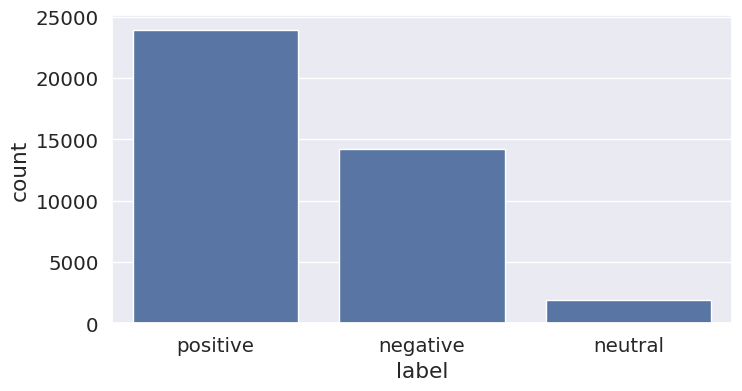

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='label',data=df)

In [ ]:
df.isnull().sum()

,0
review_description,1
label,0
company,0


In [ ]:
df[df['review_description'].isnull() == True]

,review_description,label,company
5911,NaN,negative,talbat


In [ ]:
df.duplicated().sum()

28

In [ ]:
df[df['review_description'].duplicated() == True]

,review_description,label,company
7243,حلو جدا,positive,talbat
7252,جامد جدا,positive,talbat
32074,ممتاز,positive,swvl
32087,ok,positive,swvl
32088,اسوء شركه,negative,swvl
...,...,...,...
39975,سيئ,negative,swvl
39978,معقول,neutral,swvl
39979,كويس,positive,swvl
39980,منظم,positive,swvl


In [ ]:
df=df.dropna()

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
review_description,0
label,0
company,0


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
arabic_stopwords = stopwords.words("arabic")
arabic_stopwords

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [ ]:
len(arabic_stopwords)

754

In [ ]:
egyptian_stopwords_base = [
    'يعني', 'كده', 'أوي', 'بتاع', 'بتاعة', 'إزاي', 'إيه', 'بس', 'زي', 'دي',
    'ده', 'دا', 'فين', 'ليه', 'إمتى', 'مين',
    'كام', 'هنا', 'هناك', 'جوة', 'برا', 'فوق', 'تحت', 'جوه', 'قدام', 'ورا',
    'جنب', 'علشان', 'أهو', 'بقى', 'لسه', 'كدة', 'يعنيه', 'إحنا', 'إنت', 'إنتوا',
    'هو', 'هي', 'دول', 'كمان', 'برضو', 'أكيد', 'طب', 'بعدين', 'أيوه', 'لا'
    , 'كله', 'كلها', 'أي', 'بتوع', 'حاليًا', 'تو', 'دلوقتي', 'بكرة', 'إمبارح',
    'كل', 'كلنا', 'كلهم', 'بسرعة', 'شوية', 'شويتين', 'خالص', 'و', 'يا', 'لو',
    'لما', 'لمن', 'لغاية', 'منين', 'لحتى', 'علي', 'عن', 'قبل', 'بعد', 'تحتي',
    'فوقي', 'جنبي', 'ورايا', 'قدامي', 'جوايا', 'بره', 'أه', 'اها', 'إي', 'إوا',
    'بقا', 'بتقول', 'بتقولوا', 'يعنوا', 'كدي', 'إزيك', 'إزي', 'إزيكو', 'إزيه',
    'إزيهم', 'إزينا', 'إزيكم', 'طبعًا', 'أصلًا', 'فينك', 'فينكم', 'فينهم', 'فينه',
    'فينها', 'فينو', 'إيهده', 'إيدا', 'إيدي', 'إيدك', 'إيده', 'إيدها', 'إيدهو',
    'إيدهوم', 'كداك', 'كداه', 'كداها', 'كداهو', 'كداهم', 'انا', 'والله', 'شي',
    'كان', 'بعض', 'تم', 'فى'
]

egyptian_stopwords_extra = [
    'بتاعهم', 'بتاعنا', 'بتاعكم', 'بتاعي', 'بتاعه', 'بتاعها', 'بتاعو', 'زيك',
    'زيه', 'زيها', 'زيهم', 'زينا', 'زيكم', 'زيو', 'كديه', 'كدوه', 'كداها', 'كداهم',
    'كداهو', 'إزيكي', 'إزيكوا', 'إزيهم', 'إزينا', 'إزيكوم', 'فيني', 'فيك', 'فيهو',
    'فيها', 'فيهم', 'فيكم', 'فينا', 'إيدهي', 'إيدهوم', 'إيدينا', 'إيديك', 'إيديكم',
    'إيديهم', 'إيديه', 'بتقولي', 'بتقولو', 'بتقولهم', 'بتقولنا', 'بتقولك', 'بتقولكم',
    'يعنيكي', 'يعنيهم', 'يعنيني', 'يعنيكوم', 'يعنيها', 'يعنيهو', 'أهوه', 'أهي',
    'أهيا', 'أهيه', 'أهيهم', 'أهيها', 'أهيو', 'بقينا', 'بقيتوا', 'بقوا', 'بقيت',
    'بقيتي', 'بقي', 'لسنا', 'لسني', 'لسك',
    'لسكم', 'لسها', 'لسوا',  'أوكيكم', 'فينكي', 'فينكو', 'فينهم', 'فينهو',
    'فينها', 'فيني', 'فيكي', 'فيكو', 'إحناك', 'إحناه', 'إحناها', 'إحناهم', 'إحنانا',
    'إحناكم', 'إنتي', 'إنتو', 'إنتك', 'إنتها', 'إنتهم', 'إنتنا', 'إنتكم', 'هوي',
    'هوه', 'هوها', 'هوهم', 'هونا', 'هوكم', 'هيي', 'هيه', 'هيها', 'هيهم', 'هينا',
    'هيكم', 'دولي', 'دوله', 'دولها', 'دولهم', 'دولنا', 'دولكم', 'ديي', 'ديه',
    'ديها', 'ديهم', 'دينا', 'ديكم', 'كماني', 'كمانه', 'كمانها', 'كمانهم', 'كماننا',
    'كمانكم', 'برضوي', 'برضوه', 'برضوها', 'برضوهم', 'برضونا', 'برضوكم', 'أكيدي',
    'أكيده', 'أكيدها', 'أكيدهم', 'أكيدنا', 'أكيدكم', 'طبي', 'طبه', 'طبها', 'طبهم',
    'طبنا', 'طبكم', 'بعديني', 'بعدينه', 'بعدينها', 'بعدينهم', 'بعديننا', 'بعدينكم',
    'أيوهي', 'أيوهه', 'أيوهها', 'أيوههم', 'أيوهنا', 'أيوهكم', 'لاه', 'لاها', 'لاهم',
    'لانا', 'لاكم', 'عاديها', 'عاديهم', 'عادينا', 'عاديكم', 'كلهي',
    'كلهه', 'كلهها', 'كلههم', 'كلني', 'كلنه', 'كلنها', 'كلنهم', 'كلننا', 'كلنكم',
    'بسرعته', 'بسرعتها', 'بسرعتهم', 'بسرعتنا', 'بسرعتكم', 'شويه', 'شويات', 'شوينا',
    'شويك', 'شويكم', 'شويهم', 'شويها', 'شويهو', 'خالصي', 'خالصه', 'خالصها', 'خالصهم',
    'خالصنا', 'خالصكم', 'وو', 'ويا', 'ولو', 'ولما', 'ولمن', 'ولغاية', 'ومنين', 'ولحتى',
    'وعلي', 'وعن', 'وقبل', 'وبعد', 'وتحت', 'وفوق', 'وجنب', 'وورا', 'وقدام', 'وجوة',
    'وبره', 'وأه', 'واها', 'وإي', 'وإوا', 'وبقا', 'وبتقول', 'وبتقولوا', 'ويعني', 'وكده',
    'وإزاي', 'وإيه', 'وبس', 'وزي', 'ودي', 'وده', 'ودا', 'وماشي', 'وطيب', 'وتمام',
    'وأوكي', 'وفين', 'وليه', 'وإمتى', 'ومين', 'وكام', 'وهنا', 'وهناك', 'وجوة', 'وبرا',
    'وفوق', 'وتحت', 'وجوه', 'وقدام', 'وورا', 'وجنب', 'وعلشان', 'وأهو', 'وبقى', 'ولسه',
    'وكدة', 'ويعنيه', 'وإحنا', 'وإنت', 'وإنتوا', 'وهو', 'وهي', 'ودول', 'وكمان', 'وبرضو',
    'وأكيد', 'وطب', 'وبعدين', 'وأيوه', 'ولا', 'وعادي', 'وكله', 'وكلها', 'وأي', 'وبتوع',
    'وحاليًا', 'وتو', 'ودلوقتي', 'وبكرة', 'وإمبارح', 'وكل', 'وكلنا', 'وكلهم', 'وبسرعة',
    'إللي', 'اللي', 'الي', 'الل', 'ال', 'الو', 'الي', 'الليي', 'الليه', 'الليها', 'الليهم',
    'اللينا', 'الليكم', 'عليه', 'عليها', 'عليهم', 'علينا', 'عليكم', 'عنه', 'عنها', 'عنهم',
    'عننا', 'عنكم', 'قبله', 'قبلها', 'قبلهم', 'قبلنا', 'قبلكم', 'بعده', 'بعدها', 'بعدهم',
    'بعدنا', 'بعدكم', 'تحته', 'تحتها', 'تحتهم', 'تحتنا', 'تحتكم', 'فوقه', 'فوقها', 'فوقهم',
    'فوقنا', 'فوقكم', 'جنبه', 'جنبها', 'جنبهم', 'جنبنا', 'جنبكم', 'وراه', 'وراها', 'وراهم',
    'ورانا', 'وراكم', 'قدامه', 'قدامها', 'قدامهم', 'قدامنا', 'قدامكم', 'جواه', 'جواها',
    'جواهم', 'جوانا', 'جواكم', 'براه', 'براها', 'براهم', 'برانا', 'براكم', 'أهي', 'أهيه',
    'أهيها', 'أهيهم', 'أهينا', 'أهيكم', 'بقاه', 'بقاها', 'بقاهم', 'بقانا', 'بقاكم', 'لسهي',
    'لسهه', 'لسهها', 'لسههم', 'لسنا', 'لسهكم'
]

In [ ]:
from collections import Counter

df['review_description'] = df['review_description'].astype(str)
all_text = ' '.join(df['review_description'])
words = all_text.split()
word_freq = Counter(words)

# طباعة أكثر 20 كلمة شيوعًا
print("the most 100 word frequent", word_freq.most_common(100))

the most 100 word frequent [('من', 6904), ('جدا', 6111), ('في', 5580), ('و', 4182), ('تطبيق', 3827), ('التطبيق', 3138), ('ما', 2884), ('لا', 2652), ('ممتاز', 2590), ('بس', 2419), ('برنامج', 2325), ('الطلب', 2309), ('على', 2167), ('البرنامج', 2003), ('مش', 1989), ('انا', 1957), ('كل', 1873), ('ولا', 1730), ('جميل', 1689), ('المطاعم', 1598), ('التوصيل', 1562), ('رائع', 1551), ('مع', 1449), ('طلبات', 1443), ('حلو', 1402), ('غير', 1254), ('الله', 1125), ('خدمة', 1064), ('بعد', 1036), ('توصيل', 975), ('فيه', 969), ('ان', 957), ('مره', 908), ('المطعم', 896), ('لو', 892), ('عن', 876), ('افضل', 861), ('هذا', 845), ('والله', 844), ('اطلب', 830), ('طلبت', 822), ('فاشل', 816), ('او', 816), ('جيد', 814), ('علي', 780), ('الي', 754), ('شي', 751), ('اكثر', 750), ('..', 742), ('اي', 728), ('شكرا', 727), ('كان', 710), ('انصح', 701), ('سيء', 694), ('خدمه', 676), ('يوصل', 660), ('فى', 659), ('لكن', 656), ('العملاء', 638), ('.', 633), ('مطاعم', 633), ('لي', 630), ('مطعم', 629), ('يوجد', 619), ('يكون', 619

In [ ]:
df['stop_words'] = df['review_description'].apply(lambda x: len(set(x.split()) & set(arabic_stopwords)))
df.stop_words.value_counts()


,count
stop_words,
0,19516
1,8855
2,4757
3,2758
4,1581
5,919
6,586
7,345
8,230


In [ ]:
df.head()

,review_description,label,company,stop_words
0,رائع,positive,talbat,0
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,positive,talbat,1
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,negative,talbat,1
3,لماذا لا يمكننا طلب من ماكدونالدز؟,negative,talbat,2
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,negative,talbat,4


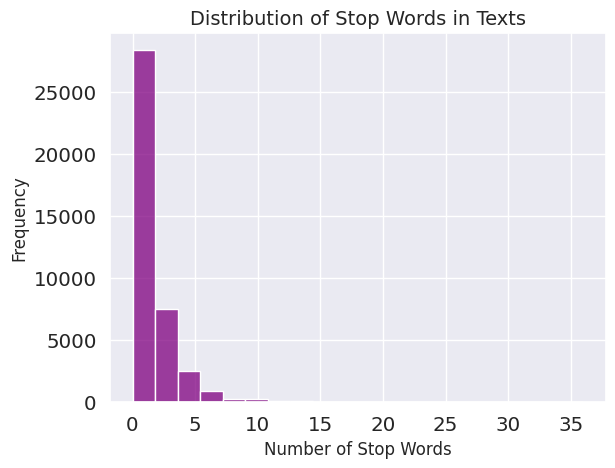

In [ ]:

sns.histplot(df['stop_words'], bins=20, color='purple', kde=False)
plt.title('Distribution of Stop Words in Texts', fontsize=14)
plt.xlabel('Number of Stop Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [ ]:
def emoji_counter(sentence):
    return emoji.emoji_count(sentence)

df['emoji_count'] = df['review_description'].apply(lambda x: emoji_counter(x))
df.emoji_count.value_counts()[:10]

,count
emoji_count,
0,35292
1,1770
2,1150
3,583
4,359
5,217
6,137
7,88
8,67


In [ ]:
 df.head()

,review_description,label,company,stop_words,emoji_count
0,رائع,positive,talbat,0,0
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,positive,talbat,1,0
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,negative,talbat,1,0
3,لماذا لا يمكننا طلب من ماكدونالدز؟,negative,talbat,2,0
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,negative,talbat,4,0


In [ ]:
emojis_data = df[df['emoji_count'] > 0]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40017 entries, 0 to 40045
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_description  40017 non-null  object
 1   label               40017 non-null  object
 2   company             40017 non-null  object
 3   stop_words          40017 non-null  int64 
 4   emoji_count         40017 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.8+ MB


In [ ]:
emojis_data

,review_description,label,company,stop_words,emoji_count
44,👎,negative,talbat,0,1
47,من التجارب السيئة طلبت من نور البخاري (البحرين...,negative,talbat,7,2
50,بصراحة تغيير كبير في سياسة طلبات مع الزبائن، ه...,neutral,talbat,5,1
67,Wo 🙌🙌💋💋💋💋💋💋💙💙💙❤❤💖💖💖👍👍👍👌,positive,talbat,0,20
71,جحهنناغنمجظ جحختاىةزونه😋😋😋😋😋😋😋😋😋,negative,talbat,0,9
...,...,...,...,...,...
39906,شركه منظمه ومحترمه❤,positive,Ezz Steel,0,1
39914,\nمؤخرا بقى زي الزفت حقيقي\n:اخر مواقف اتعرضتل...,negative,swvl,14,1
40024,انا تقريبا كل رحلة بركبها بيبقى فى تأخير حوالى...,negative,swvl,2,4
40037,الخدمة جيدة ولكن يرجى تعديل سلوك بعض السائقين ...,positive,swvl,2,2


In [ ]:
df = df.drop(df[df['review_description'] == "جحهنناغنمجظ جحختاىةزونه😋😋😋😋😋😋😋😋😋"].index)


In [ ]:
emojis_data

,review_description,label,company,stop_words,emoji_count
44,👎,negative,talbat,0,1
47,من التجارب السيئة طلبت من نور البخاري (البحرين...,negative,talbat,7,2
50,بصراحة تغيير كبير في سياسة طلبات مع الزبائن، ه...,neutral,talbat,5,1
67,Wo 🙌🙌💋💋💋💋💋💋💙💙💙❤❤💖💖💖👍👍👍👌,positive,talbat,0,20
71,جحهنناغنمجظ جحختاىةزونه😋😋😋😋😋😋😋😋😋,negative,talbat,0,9
...,...,...,...,...,...
39906,شركه منظمه ومحترمه❤,positive,Ezz Steel,0,1
39914,\nمؤخرا بقى زي الزفت حقيقي\n:اخر مواقف اتعرضتل...,negative,swvl,14,1
40024,انا تقريبا كل رحلة بركبها بيبقى فى تأخير حوالى...,negative,swvl,2,4
40037,الخدمة جيدة ولكن يرجى تعديل سلوك بعض السائقين ...,positive,swvl,2,2


In [ ]:
def extract_emoji(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(emoji.distinct_emoji_list(char) for char in word):
            emoji_list.append(word)

    return emoji_list


In [ ]:
emojis_data['emoji'] = emojis_data['review_description'].apply(lambda x: extract_emoji(x))
emojis_data['emoji'] = emojis_data['emoji'].apply(lambda x: ' '.join([word for word in x ]))


In [ ]:
emojis_data

,review_description,label,company,stop_words,emoji_count,emoji
44,👎,negative,talbat,0,1,👎
47,من التجارب السيئة طلبت من نور البخاري (البحرين...,negative,talbat,7,2,😡 😡
50,بصراحة تغيير كبير في سياسة طلبات مع الزبائن، ه...,neutral,talbat,5,1,🌹
67,Wo 🙌🙌💋💋💋💋💋💋💙💙💙❤❤💖💖💖👍👍👍👌,positive,talbat,0,20,🙌 🙌 💋 💋 💋 💋 💋 💋 💙 💙 💙 ❤ ❤ 💖 💖 💖 👍 👍 👍 👌
71,جحهنناغنمجظ جحختاىةزونه😋😋😋😋😋😋😋😋😋,negative,talbat,0,9,😋 😋 😋 😋 😋 😋 😋 😋 😋
...,...,...,...,...,...,...
39906,شركه منظمه ومحترمه❤,positive,Ezz Steel,0,1,❤
39914,\nمؤخرا بقى زي الزفت حقيقي\n:اخر مواقف اتعرضتل...,negative,swvl,14,1,😂
40024,انا تقريبا كل رحلة بركبها بيبقى فى تأخير حوالى...,negative,swvl,2,4,🥵 🥵 😡 😡
40037,الخدمة جيدة ولكن يرجى تعديل سلوك بعض السائقين ...,positive,swvl,2,2,🙂 🌼


In [ ]:
pd.Series(' '.join(emojis_data['emoji']).split()).value_counts()[:10]


,count
👍,1482
😍,1370
❤,1121
❤️,1091
👎,928
😡,638
😘,634
😠,509
👌,472
😂,349


In [ ]:
emojis = {
    "🙂":"يبتسم",
    "😂":"يضحك",
    "💔":"قلب حزين",
    "🙂":"يبتسم",
    "❤️":"حب",
    "❤":"حب",
    "😍":"حب",
    "😭":"يبكي",
    "😢":"حزن",
    "😔":"حزن",
    "♥":"حب",
    "💜":"حب",
    "😅":"يضحك",
    "🙁":"حزين",
    "💕":"حب",
    "💙":"حب",
    "😞":"حزين",
    "😊":"سعادة",
    "👏":"يصفق",
    "👌":"احسنت",
    "😴":"ينام",
    "😀":"يضحك",
 "😌":"حزين",
    "🌹":"وردة",
    "🙈":"حب",
    "😄":"يضحك",
    "😐":"محايد",
    "✌":"منتصر",
    "✨":"نجمه",
    "🤔":"تفكير",
    "😏":"يستهزء",
    "😒":"يستهزء",
    "🙄":"ملل",
    "😕":"عصبية",
    "😃":"يضحك",
    "🌸":"وردة",
    "😓":"حزن",
    "💞":"حب",
    "💗":"حب",
    "😑":"منزعج",
    "💭":"تفكير",
    "😎":"ثقة",
    "💛":"حب",
    "😩":"حزين",
    "💪":"عضلات",
    "👍":"موافق",
    "🙏🏻":"رجاء طلب",
    "😳":"مصدوم",
    "👏🏼":"تصفيق",
    "🎶":"موسيقي",
    "🌚":"صمت",
    "💚":"حب",
    "🙏":"رجاء طلب",
    "💘":"حب",
    "🍃":"سلام",
    "☺":"يضحك",
    "🐸":"ضفدع",
    "😶":"مصدوم",
    "✌️":"مرح",
    "✋🏻":"توقف",
    "😉":"غمزة",
    "🌷":"حب",
    "🙃":"مبتسم",
    "😫":"حزين",
    "😨":"مصدوم",
    "🎼 ":"موسيقي",
    "🍁":"مرح",
    "🍂":"مرح",
    "💟":"حب",
    "😪":"حزن",
    "😆":"يضحك",
    "😣":"استياء",
    "☺️":"حب",
    "😱":"كارثة",
    "😁":"يضحك",
    "😖":"استياء",
    "🏃🏼":"يجري",
    "😡":"غضب",
    "🚶":"يسير",
    "🤕":"مرض",
    "‼️":"تعجب",
    "🕊":"طائر",
    "👌🏻":"احسنت",
    "❣":"حب",
    "🙊":"مصدوم",
    "💃":"سعادة مرح",
    "💃🏼":"سعادة مرح",
    "😜":"مرح",
    "👊":"ضربة",
    "😟":"استياء",
    "💖":"حب",
    "😥":"حزن",
    "🎻":"موسيقي",
    "✒":"يكتب",
    "🚶🏻":"يسير",
    "💎":"الماظ",
    "😷":"وباء مرض",
    "☝":"واحد",
    "🚬":"تدخين",
    "💐" : "ورد",
    "🌞" : "شمس",
    "👆" : "الاول",
    "⚠️" :"تحذير",
    "🤗" : "احتواء",
    "✖️": "غلط",
    "📍"  : "مكان",
    "👸" : "ملكه",
    "👑" : "تاج",
    "✔️" : "صح",
    "💌": "قلب",
     "😲" : "مندهش",
    "💦": "ماء",
    "🚫" : "خطا",
    "👏🏻" : "برافو",
    "🏊" :"يسبح",
    "👍🏻": "تمام",
    "⭕️" :"دائره كبيره",
    "🎷" : "ساكسفون",
    "👋": "تلويح باليد",
    "✌🏼": "علامه النصر",
    "🌝":"مبتسم",
    "➿"  : "عقده مزدوجه",
    "💪🏼" : "قوي",
    "📩":  "تواصل معي",
    "☕️": "قهوه",
    "😧" : "قلق و صدمة",
    "🗨": "رسالة",
    "❗️" :"تعجب",
    "🙆🏻": "اشاره موافقه",
    "👯" :"اخوات",
    "©" :  "رمز",
    "👵🏽" :"سيده عجوزه",
    "🐣": "كتكوت",
    "🙌": "تشجيع",
    "🙇": "شخص ينحني",
    "👐🏽":"ايدي مفتوحه",
    "👌🏽": "بالظبط",
    "⁉️" : "استنكار",
    "⚽️": "كوره",
    "🕶" :"حب",
    "🎈" :"بالون",
    "🎀":    "ورده",
    "💵":  "فلوس",
    "😋":  "جائع",
    "😛":  "يغيظ",
    "😠":  "غاضب",
    "✍🏻":  "يكتب",
    "🌾":  "ارز",
    "👣":  "اثر قدمين",
    "❌":"رفض",
    "🍟":"طعام",
    "👬":"صداقة",
    "🐰":"ارنب",
    "☂":"مطر",
     "⚜":"مملكة فرنسا",
    "🐑":"خروف",
    "🗣":"صوت مرتفع",
    "👌🏼":"احسنت",
    "☘":"مرح",
    "😮":"صدمة",
    "😦":"قلق",
    "⭕":"الحق",
    "✏️":"قلم",
    "ℹ":"معلومات",
    "🙍🏻":"رفض",
    "⚪️":"نضارة نقاء",
    "🐤":"حزن",
    "💫":"مرح",
    "💝":"حب",
    "🍔":"طعام",
    "❤︎":"حب",
    "✈️":"سفر",
    "🏃🏻‍♀️":"يسير",
    "🍳":"ذكر",
    "🎤":"مايك غناء",
    "🎾":"كره",
    "🐔":"دجاجة",
    "🙋":"سؤال",
    "📮":"بحر",
    "💉":"دواء",
    "🙏🏼":"رجاء طلب",
    "💂🏿 ":"حارس",
    "🎬":"سينما",
    "♦️":"مرح",
    "💡":"قكرة",
    "‼":"تعجب",
    "👼":"طفل",
    "🔑":"مفتاح",
    "♥️":"حب",
    "🕋":"كعبة",
    "🐓":"دجاجة",
    "💩":"معترض",
    "👽":"فضائي",
    "☔️":"مطر",
    "🍷":"عصير",
    "🌟":"نجمة",
    "☁️":"سحب",
    "👃":"معترض",
    "🌺":"مرح",
     "🔪":"سكينة",
    "♨":"سخونية",
    "👊🏼":"ضرب",
    "✏":"قلم",
    "🚶🏾‍♀️":"يسير",
    "👊":"ضربة",
    "◾️":"وقف",
    "😚":"حب",
    "🔸":"مرح",
    "👎🏻":"لا يعجبني",
    "👊🏽":"ضربة",
    "😙":"حب",
    "🎥":"تصوير",
    "👉":"جذب انتباه",
    "👏🏽":"يصفق",
    "💪🏻":"عضلات",
    "🏴":"اسود",
    "🔥":"حريق",
    "😬":"عدم الراحة",
    "👊🏿":"يضرب",
    "🌿":"ورقه شجره",
     "✋🏼":"كف ايد",
    "👐":"ايدي مفتوحه",
    "☠️":"وجه مرعب",
    "🎉":"يهنئ",
    "🔕" :"صامت",
    "😿":"وجه حزين",
    "☹️":"وجه يائس",
    "😘" :"حب",
    "😰" :"خوف و حزن",
    "🌼":"ورده",
    "💋":  "بوسه",
    "👇":"لاسفل",
    "❣️":"حب",
    "🎧":"سماعات",
    "📝":"يكتب",
    "😇":"دايخ",
    "😈":"رعب",
    "🏃":"يجري",
    "✌🏻":"علامه النصر",
    "🔫":"يضرب",
    "❗️":"تعجب",
    "👎":"غير موافق",
    "🔐":"قفل",
    "👈":"لليمين",
    "™":"رمز",
    "🚶🏽":"يتمشي",
    "😯":"متفاجأ",
    "✊":"يد مغلقه",
    "😻":"اعجاب",
    "🙉" :"قرد",
    "👧":"طفله صغيره",
    "🔴":"دائره حمراء",
    "💪🏽":"قوه",
    "💤":"ينام",
    "👀":"ينظر",
    "✍🏻":"يكتب",
    "❄️":"تلج",
    "💀":"رعب",
    "😤":"وجه عابس",
    "🖋":"قلم",
    "🎩":"كاب",
     "☕️":"قهوه",
    "😹":"ضحك",
    "💓":"حب",
    "☄️ ":"نار",
    "👻":"رعب",
    }

emoticons_to_emoji = {
    ":)" : "🙂",
    ":(" : "🙁",
    "xD" : "😆",
    ":=(": "😭",
    ":'(": "😢",
    ":'‑(": "😢",
    "XD" : "😂",
    ":D" : "🙂",
    "♬" : "موسيقي",
    "♡" : "❤",
    "☻"  : "🙂",
    }

**Cleaning**

In [ ]:
def remove_stop_words(text):
    Text=[i for i in str(text).split() if i not in arabic_stopwords]
    return " ".join(Text)

In [ ]:
!pip install nltk

In [ ]:
def ISRI_Stemmer(text):
    #making an object
    stemmer = ISRIStemmer()

    #stemming each word
    text = stemmer.stem(text)
    text = stemmer.pre32(text)
    text = stemmer.suf32(text)

    return text

def Snowball_stemmer(text):
    text = text.split()
    #making an object
    stemmer = SnowballStemmer("arabic")

    #stemming each word
    text=[stemmer.stem(y) for y in text]

    return " " .join(text)

def Arabic_Light_Stemmer(text):
    #making an object
    Arabic_Stemmer = ArabicLightStemmer()

    #stemming each word
    text=[Arabic_Stemmer.light_stem(y) for y in text.split()]

    return " " .join(text)

In [ ]:
text = "المكتبة كانت جميلة"
result = ISRI_Stemmer(text)
result


'مكتبة كانت جميلة'

In [ ]:
text = "المكتبة كانت جميلة"
result = Snowball_stemmer(text)
result

'مكتب كان جميل'

In [ ]:
text = "المكتبة كانت جميلة"
result = Arabic_Light_Stemmer(text)
result

'مكتب انت جميل'

In [ ]:
def normalizeArabic(text):
    text = text.strip()
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ه","ة",text)

    text = re.sub("[إأٱآا]", "ا", text)
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('ييي', 'ي')
    text = text.replace('اا', 'ا')

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)

    # Remove longation
    text = re.sub(r'(.)\1+', r"\1\1", text)

    #Strip vowels from a text, include Shadda.
    text = araby.strip_tashkeel(text)

    #Strip diacritics from a text, include harakats and small lettres The striped marks are
    text = araby.strip_diacritics(text)
    text=''.join([i for i in text if not i.isdigit()])
    return text

In [ ]:
def Removing_non_arabic(text):
    text = re.sub('[A-Za-z]+',' ',text)
    return text

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_emoji(string):

    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string).strip()


In [ ]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text).strip()



def remove_extra_Space(text):
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    return  " ".join(text.split())

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.review_description.iloc[i].split()) < 3:
            df.review_description.iloc[i] = np.nan


In [ ]:
def replace_emoticon_with_emojis(text):
    for i in range (len(text)):
        message = text.iloc[i]
        seperarate_word = message.split(' ')
        cleaned_df.review_description.iloc[i] = ""

        for word in seperarate_word:
            text.iloc[i] += emoticons_to_emoji.get(word, word) + " "


In [ ]:
def replace_emojis_with_text(text):
    for i in range (len(text)):
            message = text.iloc[i]
            seperarate_word = regex.findall(r'\X', message)
            text.iloc[i] = ""

            for word in seperarate_word:
                if any(emoji.distinct_emoji_list(char)  for char in word):
                        text.iloc[i] += " " + emojis.get(word, word) + " "
                else:
                        text.iloc[i] +=  emojis.get(word, word) + ""

def space_between_emojis(s):
    return ''.join((' '+c+' ') if c in emoji.UNICODE_EMOJI['en'] else c for c in s)


In [ ]:
def remove_hashtages_and_mentions(text):
    text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    return text

In [ ]:
cleaned_df = df

In [ ]:
df.iloc[0].review_description


'رائع'

In [ ]:
cleaned_df.iloc[0].review_description

'رائع'

In [ ]:
replace_emoticon_with_emojis(cleaned_df.review_description)

In [ ]:
# make a new column for emojis only

cleaned_df['only_emojis'] = cleaned_df['review_description'].apply(lambda x: extract_emoji(str(x)))
cleaned_df['only_emojis'] = cleaned_df['only_emojis'].apply(lambda x: ' '.join(x))

# remove emojis for column review_description
def remove_emojis_from_text(text):
    data = regex.findall(r'\X', text)
    return ''.join([char for char in data if not any(emoji.distinct_emoji_list(c) for c in char)])

cleaned_df['review_description'] = cleaned_df['review_description'].apply(lambda x: remove_emojis_from_text(str(x)))


In [ ]:
cleaned_df

In [ ]:
cleaned_df.text=cleaned_df.review_description.apply(lambda text : remove_stop_words(text))


In [ ]:
cleaned_df.review_description=cleaned_df.review_description.apply(lambda text : Removing_non_arabic(text))


In [ ]:
df.review_description.iloc[1]

In [ ]:
cleaned_df.iloc[1].review_description

In [ ]:
cleaned_df.review_description=cleaned_df.review_description.apply(lambda text : normalizeArabic(text))


In [ ]:
cleaned_df.review_description=cleaned_df.review_description.apply(lambda text : Removing_numbers(text))


In [ ]:
cleaned_df.iloc[1].review_description

In [ ]:
cleaned_df.review_description=cleaned_df.review_description.apply(lambda text : remove_hashtages_and_mentions(text))


In [ ]:
cleaned_df.review_description=cleaned_df.review_description.apply(lambda text : Removing_punctuations(text))


In [ ]:
cleaned_df

In [ ]:
cleaned_df.review_description=cleaned_df.review_description.apply(lambda text : ISRI_Stemmer(text))


In [ ]:
cleaned_df.duplicated().sum()

In [ ]:
cleaned_df.duplicated().sum()

In [ ]:
cleaned_df=cleaned_df.drop_duplicates()

In [ ]:
cleaned_df.duplicated().sum()

In [ ]:
cleaned_df.head()

In [ ]:
cleaned_df.isnull().sum()


In [ ]:
import pandas as pd

# مثال: لو عندك DataFrame اسمه cleaned_df
cleaned_df.to_csv("/content/cleaned_df.csv", index=False,encoding='utf-8-sig')


In [ ]:
from IPython.display import FileLink

FileLink("/content/cleaned_df.csv")

/content/cleaned_df.csv

In [ ]:
!pip install python-bidi arabic-reshaper

# K_mean

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 1: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 2: Generate Synthetic Data
X, y_true = make_blobs(n_samples=600, centers=3, cluster_std=0.70, random_state=0)

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load and clean data
df = pd.read_csv('/content/cleaned_df (2).csv')
df = df.dropna(subset=['review_description'])

# Vectorize text
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df['review_description']).toarray()

# K-Means from scratch functions
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], size=k, replace=False)
    return X[indices]

def compute_distances(X, centroids):
    return np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

def assign_clusters(distances):
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def k_means(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        distances = compute_distances(X, centroids)
        labels = assign_clusters(distances)
        new_centroids = update_centroids(X, labels, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return centroids, labels

# Run K-Means
centroids, labels = k_means(X, k=3)

# Optional: Add cluster labels to your DataFrame
df['cluster'] = labels


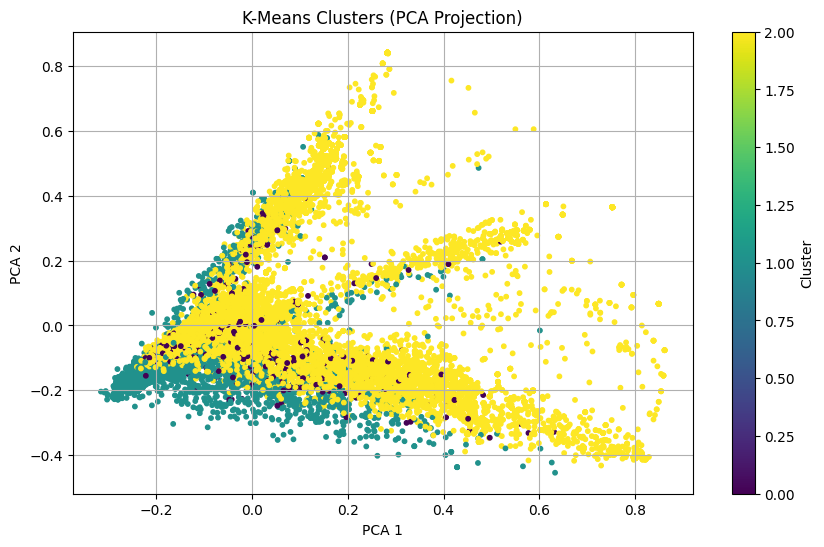

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# تقليل الأبعاد من 100 إلى 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# رسم التجميعات (clusters)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10)
plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


Silhouette Score: 0.06


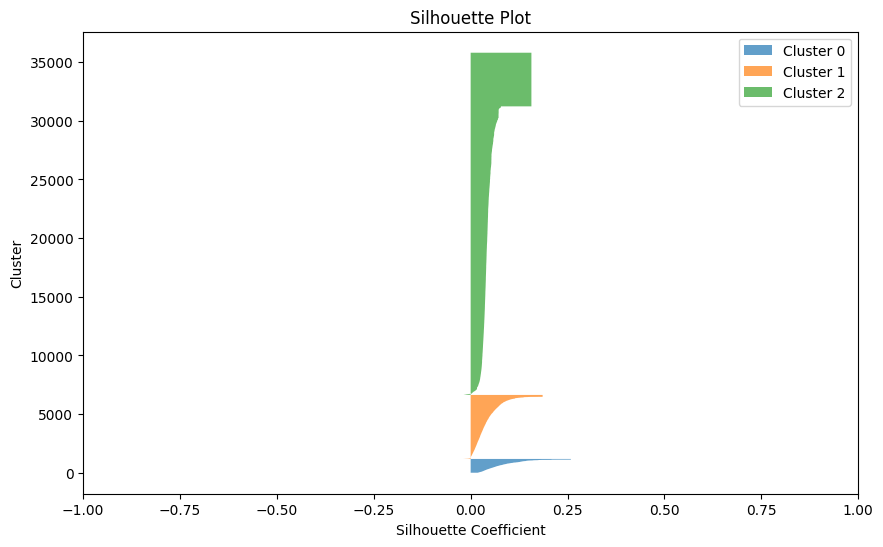

In [ ]:
from sklearn.metrics import silhouette_score

# حساب درجة Silhouette للمجموعات
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.2f}")

# رسم مخطط Silhouette لعرض الجودة البصرية للتجميع
from sklearn.metrics import silhouette_samples
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim([-1, 1])
ax.set_title('Silhouette Plot')
ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster')

sample_silhouette_values = silhouette_samples(X, labels)

y_lower = 10
for i in range(3):  # بما أن لدينا 3 مجموعات
    # تحديد النقاط الخاصة بكل مجموعة
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    y_upper = y_lower + len(ith_cluster_silhouette_values)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values, alpha=0.7, label=f"Cluster {i}")
    y_lower = y_upper + 10  # ضع فراغ بين المجموعات

ax.legend()
plt.show()



#logistic regrision#

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split



In [ ]:
import pandas as pd

cleaned_df =pd.read_csv('/content/cleaned_df (2).csv')

cleaned_df .head()

,review_description,label,company,stop_words,emoji_count,only_emojis
0,راءع,positive,talbat,0,0,NaN
1,رنامج راءع جد ساعد على تلب احتياج شكل سرع,positive,talbat,1,0,NaN
2,تطبيق لا يغتح داءم يعطين لا وجد تصال شبك مع ان...,negative,talbat,1,0,NaN
3,ماذ لا مك طلب من ماكدونالدز,negative,talbat,2,0,NaN
4,برنامج يظةر كل مطاعم و مغلق مع انة تكون اتح قا...,negative,talbat,4,0,NaN


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [ ]:
def compute_cost(X, y, weights):
    m = X.shape[0]
    h = sigmoid(np.dot(X, weights))
    epsilon = 1e-5
    cost = -(1/m) * (np.dot(y, np.log(h + epsilon)) + np.dot((1 - y), np.log(1 - h + epsilon)))
    return cost

In [ ]:
def train_logistic_regression_with_metrics(X, y, lr=0.1, epochs=1000, X_val=None, y_val=None):
    m, n = X.shape
    weights = np.zeros(n)
    cost_history = []
    accuracy_history = []

    for i in range(epochs):
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        weights -= lr * gradient

        if i % 10 == 0:
            cost = compute_cost(X, y, weights)
            cost_history.append(cost)

            if X_val is not None:
                y_pred = predict(X_val, weights)
                acc = np.mean(y_pred == y_val)
                accuracy_history.append(acc)

    return weights, cost_history, accuracy_history


In [ ]:
def predict(X, weights):
    probs = sigmoid(np.dot(X, weights))
    return [1 if p >= 0.5 else 0 for p in probs]


In [ ]:
# إزالة القيم المفقودة أو استبدالها بنص فارغ
cleaned_df['review_description'] = cleaned_df['review_description'].fillna('')

# تحويل النصوص إلى bag of words
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(cleaned_df['review_description']).toarray()


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(cleaned_df['label'])


In [ ]:
# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
weights, cost_history, accuracy_history = train_logistic_regression_with_metrics(
    X_train, y_train, lr=0.1, epochs=1000, X_val=X_test, y_val=y_test)


In [ ]:
# التنبؤ
y_pred = predict(X_test, weights)

In [ ]:
# حساب الدقة
accuracy = np.mean(y_pred == y_test)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.18


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

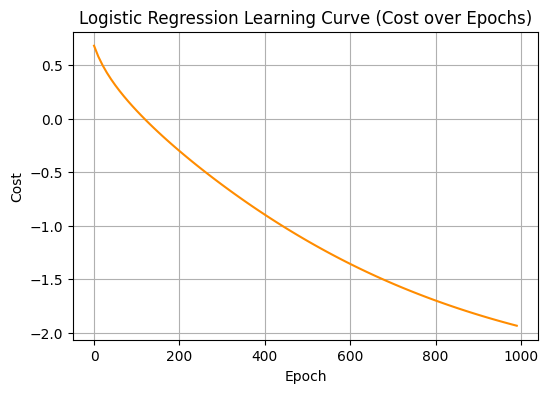

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(0, 1000, 10), cost_history, color='darkorange')
plt.title('Logistic Regression Learning Curve (Cost over Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


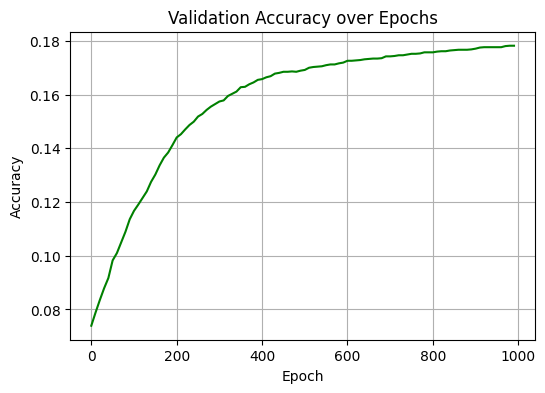

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(0, 1000, 10), accuracy_history, color='green')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [ ]:
softmax_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred = softmax_model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8205548722153888

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      2736
           1       0.20      0.07      0.10       361
           2       0.83      0.92      0.87      4220

    accuracy                           0.82      7317
   macro avg       0.62      0.58      0.59      7317
weighted avg       0.80      0.82      0.81      7317



#without sklearn.#

In [ ]:
import numpy as np

# دالة Softmax
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # للاستقرار العددي
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# تحويل البيانات إلى مصفوفات
X = vectorizer.fit_transform(cleaned_df['review_description']).toarray()
y = pd.get_dummies(cleaned_df['label']).values  # تحويل الفئات إلى one-hot encoding

# تهيئة المتغيرات
n_features = X.shape[1]
n_classes = y.shape[1]
weights = np.random.randn(n_features, n_classes) * 0.01
bias = np.zeros(n_classes)
learning_rate = 0.01
n_epochs = 1000

# تدريب النموذج
for epoch in range(n_epochs):
    # الحسابات الأمامية
    z = np.dot(X, weights) + bias
    y_pred = softmax(z)

    # حساب الخسارة (Cross-Entropy)
    loss = -np.mean(np.sum(y * np.log(y_pred + 1e-10), axis=1))

    # الحسابات العكسية (Gradient Descent)
    grad = y_pred - y
    grad_weights = np.dot(X.T, grad) / X.shape[0]
    grad_bias = np.mean(grad, axis=0)

    # تحديث الأوزان
    weights -= learning_rate * grad_weights
    bias -= learning_rate * grad_bias

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# التنبؤ
z = np.dot(X, weights) + bias
y_pred = np.argmax(softmax(z), axis=1)
y_true = np.argmax(y, axis=1)
accuracy = np.mean(y_pred == y_true)
print("Accuracy:", accuracy)

Epoch 0, Loss: 1.0985
Epoch 10, Loss: 1.0783
Epoch 20, Loss: 1.0597
Epoch 30, Loss: 1.0427
Epoch 40, Loss: 1.0270
Epoch 50, Loss: 1.0125
Epoch 60, Loss: 0.9991
Epoch 70, Loss: 0.9866
Epoch 80, Loss: 0.9750
Epoch 90, Loss: 0.9641
Epoch 100, Loss: 0.9540
Epoch 110, Loss: 0.9445
Epoch 120, Loss: 0.9355
Epoch 130, Loss: 0.9271
Epoch 140, Loss: 0.9191
Epoch 150, Loss: 0.9116
Epoch 160, Loss: 0.9045
Epoch 170, Loss: 0.8978
Epoch 180, Loss: 0.8915
Epoch 190, Loss: 0.8854
Epoch 200, Loss: 0.8796
Epoch 210, Loss: 0.8742
Epoch 220, Loss: 0.8689
Epoch 230, Loss: 0.8639
Epoch 240, Loss: 0.8592
Epoch 250, Loss: 0.8546
Epoch 260, Loss: 0.8503
Epoch 270, Loss: 0.8461
Epoch 280, Loss: 0.8420
Epoch 290, Loss: 0.8382
Epoch 300, Loss: 0.8345
Epoch 310, Loss: 0.8309
Epoch 320, Loss: 0.8275
Epoch 330, Loss: 0.8242
Epoch 340, Loss: 0.8210
Epoch 350, Loss: 0.8179
Epoch 360, Loss: 0.8149
Epoch 370, Loss: 0.8121
Epoch 380, Loss: 0.8093
Epoch 390, Loss: 0.8066
Epoch 400, Loss: 0.8040
Epoch 410, Loss: 0.8015
Epo

Neural Network (FFNN)


in another notebook